In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the raw dataframe
raw_df = pd.read_csv('../data/raw/raw_data.csv', index_col=0)
raw_df

,id,type,created_at,actor_id,repo_id
205120,27784535729,PushEvent,2023-03-17 01:15:51+00:00,127452841,57149170
3577941,27806864092,PullRequestReviewCommentEvent,2023-03-17 20:52:18+00:00,3230352,1243685
516831,27785909613,CreateEvent,2023-03-17 03:09:23+00:00,117501131,615134856
799142,27787333714,PushEvent,2023-03-17 05:16:12+00:00,8467937,608286295
80111,27784020870,DeleteEvent,2023-03-17 00:31:18+00:00,5638331,82097966
...,...,...,...,...,...
26693,27783782171,PushEvent,2023-03-17 00:10:27+00:00,8517910,410004154
2208336,27796904295,PushEvent,2023-03-17 13:13:22+00:00,82512693,589968654
1832750,27794331127,PushEvent,2023-03-17 11:18:17+00:00,106747387,602045848
3747128,27807768932,CreateEvent,2023-03-17 21:57:54+00:00,49699333,119871926


In [3]:
# Filter the data to remove the bot activities
raw_df['count'] = raw_df.groupby('actor_id')['actor_id'].transform('count')
filtered_df = raw_df.query("count >= 1 & count <= 30")
filtered_df = filtered_df.drop('count', axis=1)
filtered_df

,id,type,created_at,actor_id,repo_id
205120,27784535729,PushEvent,2023-03-17 01:15:51+00:00,127452841,57149170
3577941,27806864092,PullRequestReviewCommentEvent,2023-03-17 20:52:18+00:00,3230352,1243685
516831,27785909613,CreateEvent,2023-03-17 03:09:23+00:00,117501131,615134856
799142,27787333714,PushEvent,2023-03-17 05:16:12+00:00,8467937,608286295
80111,27784020870,DeleteEvent,2023-03-17 00:31:18+00:00,5638331,82097966
...,...,...,...,...,...
600335,27786305417,PullRequestEvent,2023-03-17 03:45:41+00:00,123062785,614169036
1883476,27794682237,PushEvent,2023-03-17 11:35:20+00:00,13216208,598103953
2208336,27796904295,PushEvent,2023-03-17 13:13:22+00:00,82512693,589968654
1832750,27794331127,PushEvent,2023-03-17 11:18:17+00:00,106747387,602045848


In [4]:
# Pivot the data to the count of event for clustering
pivot_df = pd.pivot_table(filtered_df, values='id', index='actor_id', columns='type', aggfunc=len, fill_value=0)

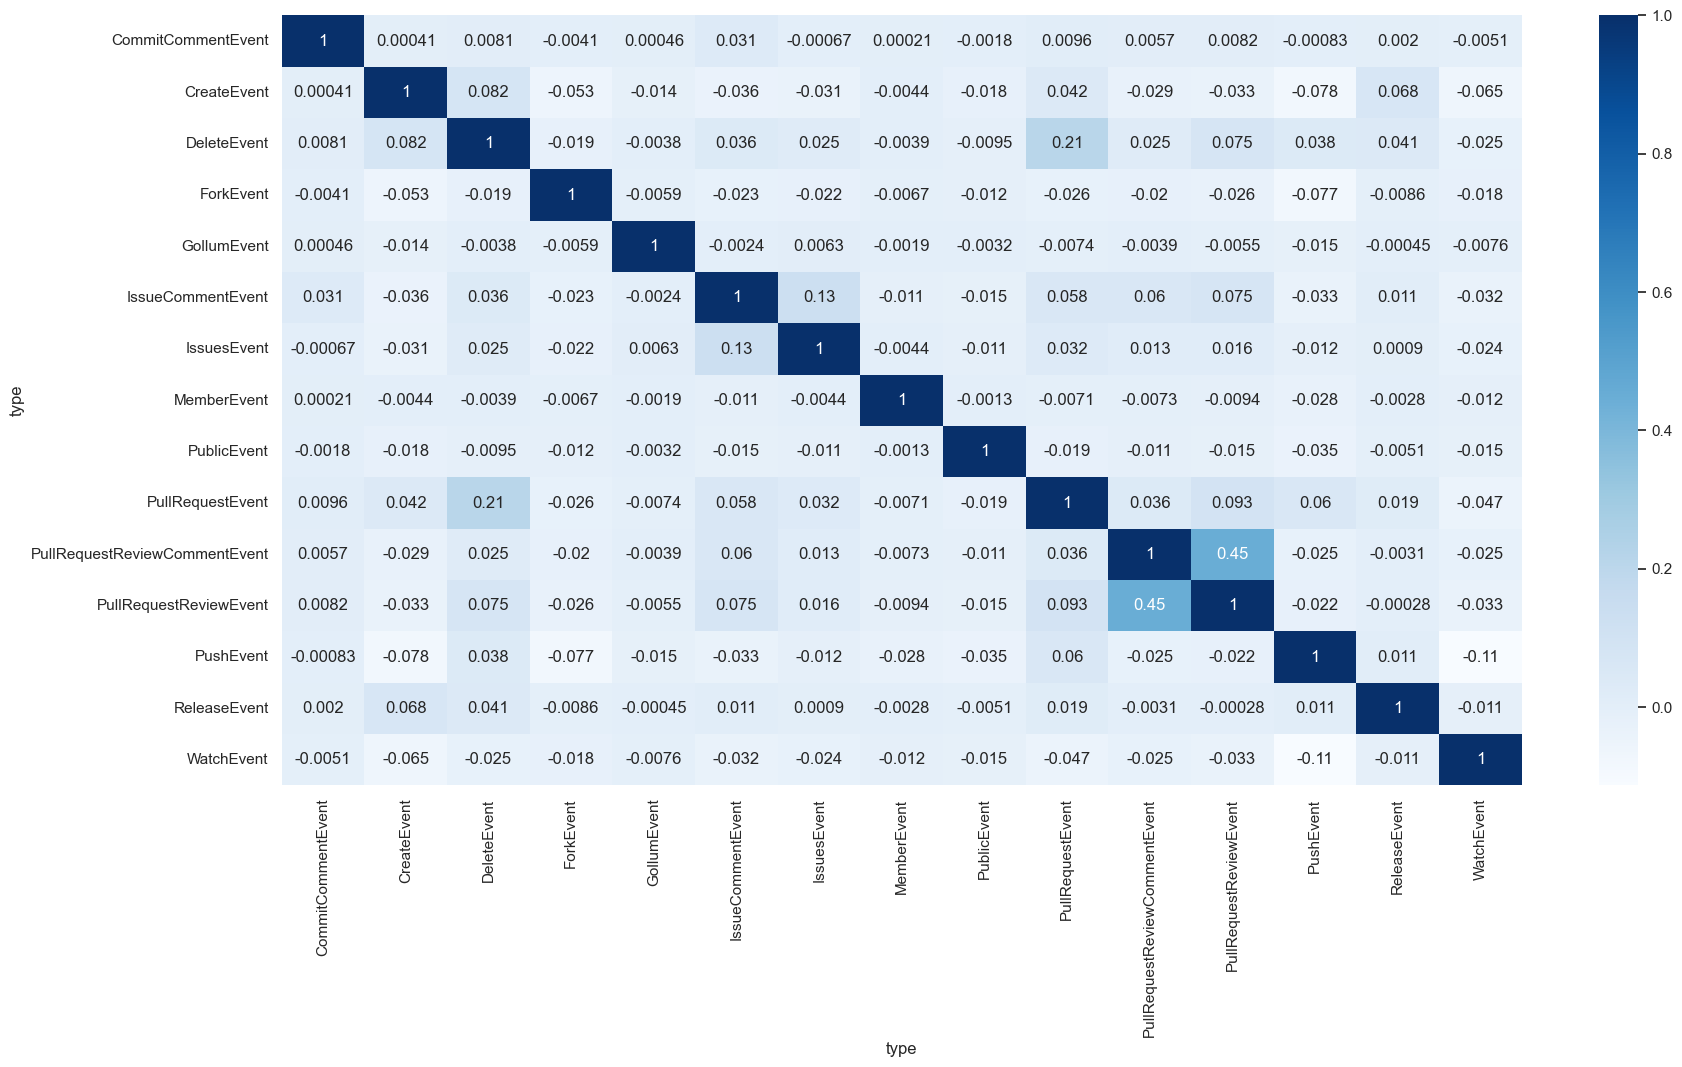

In [5]:
# Evaluate the hidden correlation to investigate probable 
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [6]:
# Feature reduction to avoid multicollinearity
pivot_df = pivot_df[['CreateEvent',
                     'ForkEvent',
                     'IssuesEvent',
                     'PullRequestEvent',
                     'PullRequestReviewEvent',
                     'PushEvent',
                     'ReleaseEvent',
                     'WatchEvent']]

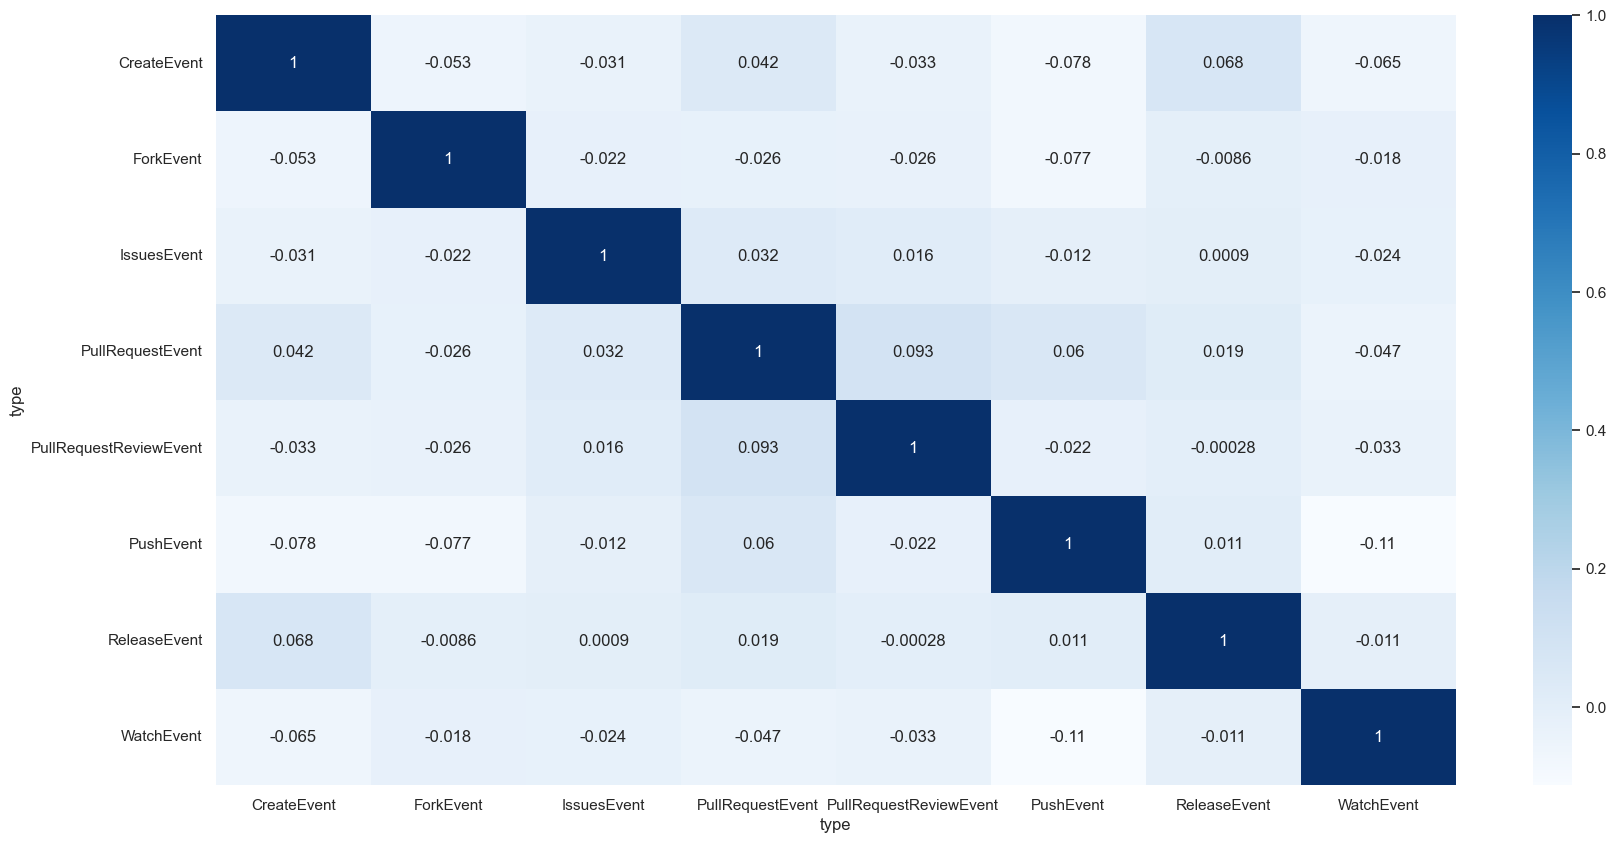

In [7]:
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [8]:
pivot_df.to_csv('../data/processed/processed_ml.csv')